In [1]:
import numpy as np 
from numpy.linalg import cholesky
import matplotlib.pyplot as plt


array([[0.98109931, 0.79297562],
       [0.79297562, 1.00918204]])

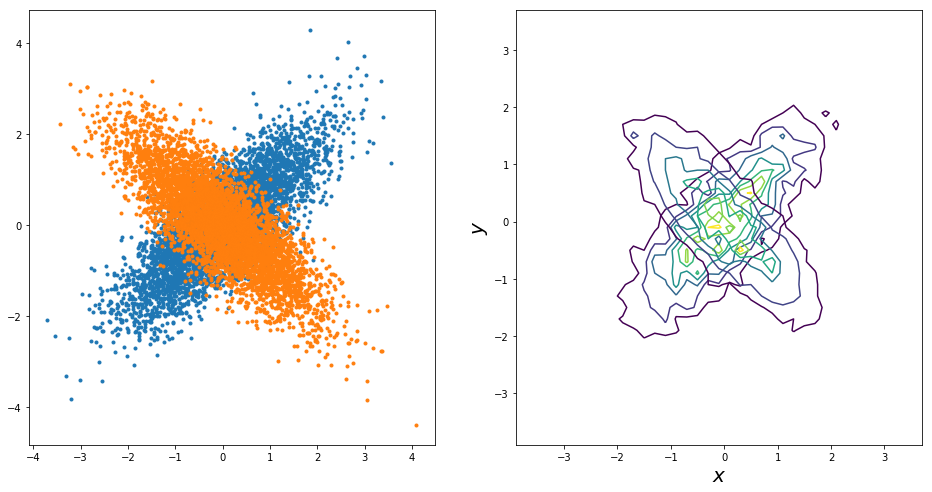

In [2]:
mu = np.array([0.,0.])

sig1,sig2 = np.array([[1, 0.8],[0.8,1]]),np.array([[1,-0.8],[-0.8,1]])

#generate random numbers from 2D normal distribution
xx = np.random.multivariate_normal(mu,sig1,5000)
xx2 = np.random.multivariate_normal(mu,sig2,5000)
xgrid = np.arange(-4.,4.,0.2)
ygrid = np.arange(-4.,4.,0.2)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
ycenter = (ygrid[0:-1]+ygrid[1:])/2.
#make 2d histogram
hxx1,xedge,yedge = np.histogram2d(xx[:,0],xx[:,1],bins=[xgrid,ygrid])
hxx2,xedge,yedge = np.histogram2d(xx2[:,0],xx2[:,1],bins=[xgrid,ygrid])
fig = plt.figure(figsize=[16,8])
ax=fig.add_subplot(121)
ax.plot(xx[:,0],xx[:,1],".")
ax.plot(xx2[:,0],xx2[:,1],".")
ax = fig.add_subplot(122)
ax.contour(xcenter,ycenter,hxx1.T)
ax.contour(xcenter,ycenter,hxx2.T)

ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$y$',fontsize=20)
np.mean(xx,axis=0)
np.cov(xx.T)

193505
抽样的均值为 [ 0.01372741 -0.01341893]
协方差矩阵为 [[ 0.97687903 -0.00717836]
 [-0.00717836  0.98142338]]


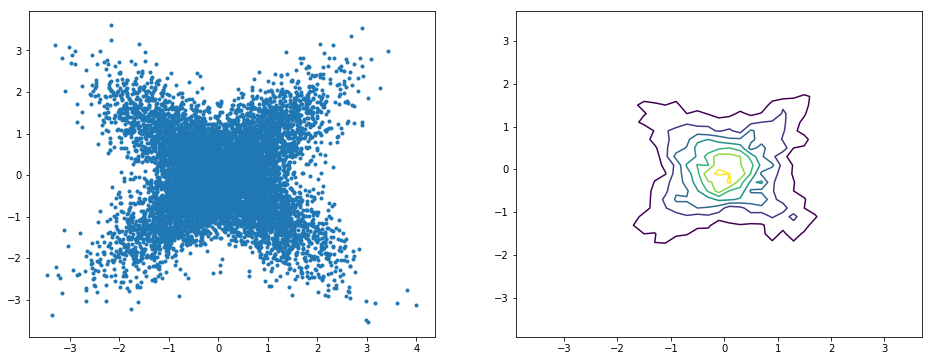

In [5]:
def isample():
    x=np.random.uniform(-4,4)#由上面的图确定的范围保证运算较少的次数
    y=np.random.uniform(-4,4)
    return [x,y]

def p(x,y):
    return (np.exp(-(x**2+y**2+1.6*x*y)/0.72)+np.exp(-(x**2+y**2-1.6*x*y)/0.72))/(2*np.pi*0.36)
                                #N([0,0],[[1,0.8];[0.8,1]])+N([0,0],[[1,-0.8];[-0.8,1]])
def reject(n):#reject samples
    x=[]
    y=[]
    count=0
    i=0
    while count<n:
        i+=1
        T=isample()
        u=np.random.rand()
        if u<p(T[0],T[1]):
            x.append(T[0])
            y.append(T[1])
            count+=1
    print(i)
    return [x,y] 
    
samples=reject(10000)#get samples

fig = plt.figure(figsize=[16,6])
ax=fig.add_subplot(121)
ax.plot(samples[0],samples[1],'.')#散点图
xgrid = np.arange(-4.,4.,0.2)
ygrid = np.arange(-4.,4.,0.2)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
ycenter = (ygrid[0:-1]+ygrid[1:])/2
hxx1,xedge,yedge = np.histogram2d(samples[0],samples[1],bins=[xgrid,ygrid])
ax = fig.add_subplot(122)
ax.contour(xcenter,ycenter,hxx1.T)#直方图
print("抽样的均值为",np.mean(samples,axis=1))#平均值
cov=np.cov(samples[0],samples[1])#协方差矩阵
print("协方差矩阵为",cov)